# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

Данные находятся в трёх файлах:
* gold_recovery_train_new.csv — обучающая выборка;
* gold_recovery_test_new.csv — тестовая выборка;
* gold_recovery_full_new.csv — исходные данные.

## Подготовка данных

### Импорт и знакомство с данными

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.svm import LinearSVR
from sklearn.dummy import DummyRegressor

from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv', parse_dates = ['date']) #обучающая выборка
df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv', parse_dates = ['date']) # тестовая выборка
df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv', parse_dates = ['date']) # исходные данные

In [3]:
df_full.info() # Выводим общую информацию о датафреймах

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                19439 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         19438 non-null  float64       
 2   final.output.concentrate_pb                         19438 non-null  float64       
 3   final.output.concentrate_sol                        19228 non-null  float64       
 4   final.output.concentrate_au                         19439 non-null  float64       
 5   final.output.recovery                               19439 non-null  float64       
 6   final.output.tail_ag                                19438 non-null  float64       
 7   final.output.tail_pb                                19338 non-null  float64       
 8   final.

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                14149 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         14148 non-null  float64       
 2   final.output.concentrate_pb                         14148 non-null  float64       
 3   final.output.concentrate_sol                        13938 non-null  float64       
 4   final.output.concentrate_au                         14149 non-null  float64       
 5   final.output.recovery                               14149 non-null  float64       
 6   final.output.tail_ag                                14149 non-null  float64       
 7   final.output.tail_pb                                14049 non-null  float64       
 8   final.

In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        5290 non-null   datetime64[ns]
 1   primary_cleaner.input.sulfate               5286 non-null   float64       
 2   primary_cleaner.input.depressant            5285 non-null   float64       
 3   primary_cleaner.input.feed_size             5290 non-null   float64       
 4   primary_cleaner.input.xanthate              5286 non-null   float64       
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64       
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64       
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64       
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64       
 9   primary_

Итак, мы видим очень больше количество столбцов с признаками. Многие из них имеют пропущенные значения.

Скорее всего они возникли из-за того, что замеряются и/или рассчитываются значительно позже.

Подведем небольшие итоги:
* df_full - 87 колонок и 19438 строк;
* df_train - 87 колонок и 14148 строк;
* df_test - 53 колонки и 5289 строк.

In [6]:
# Выведем первые строчки каждого из наших датафреймов, чтобы ознакомиться с данными еще лучше
display(df_full)
display(df_train)
display(df_test)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19434,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
19435,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
19436,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
19437,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14144,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
14145,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
14146,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
14147,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5285,2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,...,13.995957,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909
5286,2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,...,16.749781,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761
5287,2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,...,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882
5288,2017-12-31 22:59:59,179.697158,15.438979,8.070000,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,...,19.958760,-499.958750,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284


In [7]:
# Посмотрим корреляцию признаков на примере df_full.
df_full.corr()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
final.output.concentrate_ag,1.000000,0.063570,0.380142,-0.038373,0.185952,0.334596,-0.051855,0.028890,0.206569,0.071158,...,0.027343,0.104118,0.029887,-0.063246,-0.004246,0.184332,0.003693,0.156471,0.162591,0.059581
final.output.concentrate_pb,0.063570,1.000000,-0.048586,0.374400,0.151987,-0.126886,0.221372,0.094385,-0.047446,0.079160,...,0.058380,0.028962,0.115404,0.093859,0.125920,-0.024668,0.149266,-0.060038,-0.042372,0.067458
final.output.concentrate_sol,0.380142,-0.048586,1.000000,0.261225,0.265993,0.286305,0.221714,-0.023865,0.267781,0.316233,...,-0.049341,0.147304,0.020544,0.002077,-0.002361,0.163992,-0.009510,0.152343,0.245158,-0.216734
final.output.concentrate_au,-0.038373,0.374400,0.261225,1.000000,0.288568,0.080381,0.081291,0.134978,-0.031696,0.102781,...,0.008308,-0.019481,-0.015284,-0.018636,-0.000971,-0.080786,-0.016961,-0.084962,-0.082184,-0.019523
final.output.recovery,0.185952,0.151987,0.265993,0.288568,1.000000,0.125986,-0.143094,-0.050280,-0.409200,0.366954,...,0.167059,0.031317,0.158557,-0.049973,0.067014,0.011871,0.052017,0.016480,-0.025192,-0.005305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
secondary_cleaner.state.floatbank5_a_level,0.184332,-0.024668,0.163992,-0.080786,0.011871,-0.021662,0.015060,-0.073670,0.035272,-0.098079,...,0.175689,0.737533,0.069865,0.417890,0.154722,1.000000,0.108107,0.818406,0.464142,0.344494
secondary_cleaner.state.floatbank5_b_air,0.003693,0.149266,-0.009510,-0.016961,0.052017,-0.013677,0.132744,-0.135330,-0.160522,-0.088879,...,0.734503,0.289059,0.855785,0.099747,0.895832,0.108107,1.000000,0.090751,0.491707,-0.011976
secondary_cleaner.state.floatbank5_b_level,0.156471,-0.060038,0.152343,-0.084962,0.016480,-0.003762,0.041558,-0.087635,0.063404,-0.054203,...,0.147999,0.630466,0.076251,0.364582,0.135991,0.818406,0.090751,1.000000,0.411510,0.327861
secondary_cleaner.state.floatbank6_a_air,0.162591,-0.042372,0.245158,-0.082184,-0.025192,-0.055311,0.007496,-0.070706,0.038797,-0.175804,...,0.229330,0.503967,0.311676,0.087389,0.473300,0.464142,0.491707,0.411510,1.000000,0.106270


Признаков очень много и коэффициент корреляции у них разный - в основном очень слабый, хотя парочку сильно коррелирующих найти можно.

### Предобработка данных

In [8]:
df_full[df_full['final.output.concentrate_pb'].isna()].head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
2869,2016-06-08 17:59:59,NaN,NaN,10.188231,29.020814,63.725335,7.387115,2.072266,16.982505,2.908215,...,8.985634,-548.815307,7.011665,-537.231749,8.031238,-550.028193,5.984399,-549.63625,18.01224,-551.325271


In [9]:
df_train[df_train['final.output.concentrate_pb'].isna()].head() # Смотрим припуски

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
2869,2016-06-08 17:59:59,NaN,NaN,10.188231,29.020814,63.725335,7.387115,2.072266,16.982505,2.908215,...,8.985634,-548.815307,7.011665,-537.231749,8.031238,-550.028193,5.984399,-549.63625,18.01224,-551.325271


Видим всего одну строчку с двумя пропущенными значениями.

Итак, нам известно, что "данные индексируются датой и временем получения информации (признак date). Соседние по времени параметры часто похожи".
Попробуем заполнить наш пропуск, основываясь на этом выражении, последним действительным значением.

In [10]:
df_full = df_full.fillna(method='ffill')
df_train = df_train.fillna(method='ffill')

In [11]:
df_full[df_full['final.output.concentrate_pb'].isna()].head() # Проверяем

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level


### Эффективность обогащения

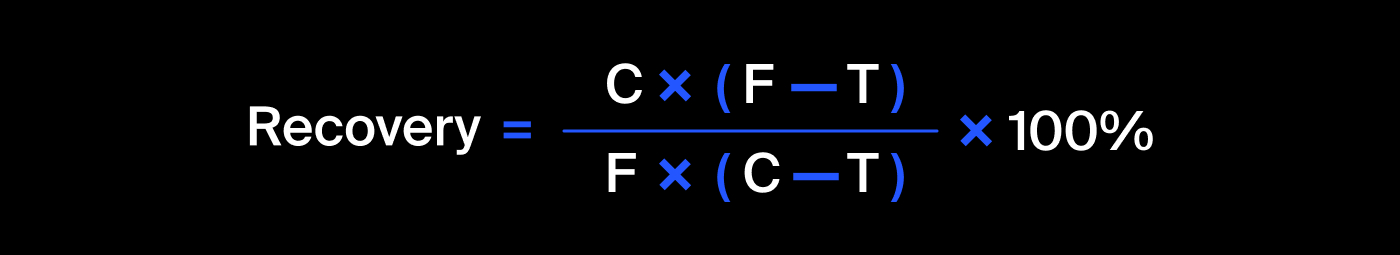

In [12]:
recovery = df_train # Создаем переменную recovery
recovery = recovery.dropna().reset_index(drop=True) # Устраняем в ней пропуски

rougher_output_recovery = recovery['rougher.output.recovery']
rougher_output_tail_au = recovery['rougher.output.tail_au']
rougher_input_feed_au = recovery['rougher.input.feed_au']
rougher_output_concentrate_au = recovery['rougher.output.concentrate_au']

In [13]:
def calc_rougher_output_recovery(rougher_output_concentrate, rougher_input_feed, rougher_output_tail):
    calc_rougher_output_recovery = ((rougher_output_concentrate_au*(rougher_input_feed_au-rougher_output_tail_au))/(rougher_input_feed_au*(rougher_output_concentrate_au-rougher_output_tail_au)))*100
    return calc_rougher_output_recovery

In [14]:
calc_rougher_output_recovery(rougher_output_concentrate_au, rougher_input_feed_au, rougher_output_tail_au)

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14144    89.574376
14145    87.724007
14146    88.890579
14147    89.858126
14148    89.514960
Length: 14149, dtype: float64

In [15]:
rougher_output_recovery

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14144    89.574376
14145    87.724007
14146    88.890579
14147    89.858126
14148    89.514960
Name: rougher.output.recovery, Length: 14149, dtype: float64

In [16]:
display('Минимальные значения:', calc_rougher_output_recovery(rougher_output_concentrate_au, rougher_input_feed_au, rougher_output_tail_au).min())
display('Максимальные значения:', calc_rougher_output_recovery(rougher_output_concentrate_au, rougher_input_feed_au, rougher_output_tail_au).max())

'Минимальные значения:'

-0.0

'Максимальные значения:'

100.0

### Метрика MAE

In [17]:
mean_absolute_error(calc_rougher_output_recovery(rougher_output_concentrate_au, rougher_input_feed_au, rougher_output_tail_au),rougher_output_recovery)

9.73512347450521e-15

Абсолютная средняя ошибка получилась $ 9.7 \cdot 10^{-15} $

### Анализ недоступных признаков

In [18]:
test_col = df_test.columns
full_col = df_full.columns

main_list = list(set(full_col)-set(test_col))
main_list = pd.Series(main_list)

display(main_list.sort_values())

23                          final.output.concentrate_ag
14                          final.output.concentrate_au
32                          final.output.concentrate_pb
25                         final.output.concentrate_sol
33                                final.output.recovery
12                                 final.output.tail_ag
13                                 final.output.tail_au
26                                 final.output.tail_pb
5                                 final.output.tail_sol
4                 primary_cleaner.output.concentrate_ag
18                primary_cleaner.output.concentrate_au
22                primary_cleaner.output.concentrate_pb
6                primary_cleaner.output.concentrate_sol
7                        primary_cleaner.output.tail_ag
10                       primary_cleaner.output.tail_au
27                       primary_cleaner.output.tail_pb
21                      primary_cleaner.output.tail_sol
24                      rougher.calculation.au_p

Как нам известно - "Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже".

По полученным данным видим, что это выходные признаки после каждого технологического этапа.
Тут есть и final.output.recovery и rougher.output.recovery, с которыми мы ранее проводили расчеты.

## Анализ данных

### Концентрация металлов (Au, Ag, Pb)

Концентрация металлов на первичной очистке:

In [19]:
concetrates_primary=[]
concetrates_primary=pd.DataFrame(concetrates_primary)
concetrates_primary['primary_cleaner.output.concentrate_ag'] = df_full['primary_cleaner.output.concentrate_ag']
concetrates_primary['primary_cleaner.output.concentrate_pb'] = df_full['primary_cleaner.output.concentrate_pb']
concetrates_primary['primary_cleaner.output.concentrate_sol'] = df_full['primary_cleaner.output.concentrate_sol']
concetrates_primary['primary_cleaner.output.concentrate_au'] = df_full['primary_cleaner.output.concentrate_au']

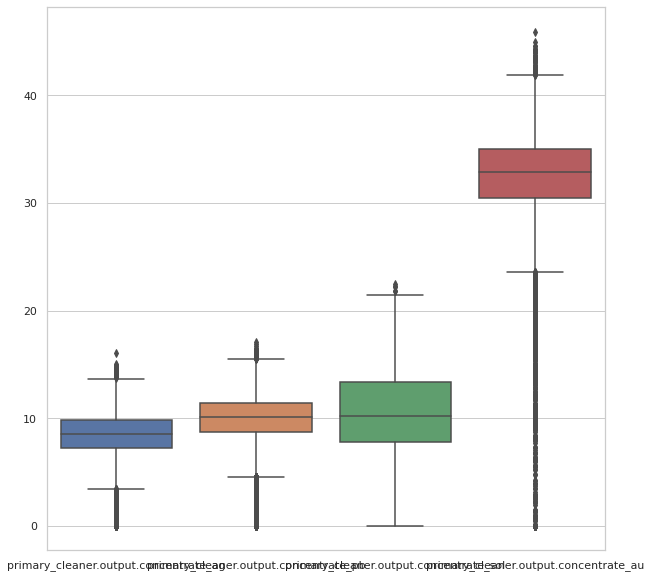

In [20]:
plt.figure(figsize=(10, 10))
a = sns.set(style="whitegrid")
a = sns.boxplot(data=concetrates_primary)

Концентрация металлов на финальной очистке:

In [21]:
concetrates_final=[]
concetrates_final=pd.DataFrame(concetrates_final)
concetrates_final['final.output.concentrate_ag'] = df_full['final.output.concentrate_ag']
concetrates_final['final.output.concentrate_pb'] = df_full['final.output.concentrate_pb']
concetrates_final['final.output.concentrate_sol'] = df_full['final.output.concentrate_sol']
concetrates_final['final.output.concentrate_au'] = df_full['final.output.concentrate_au']

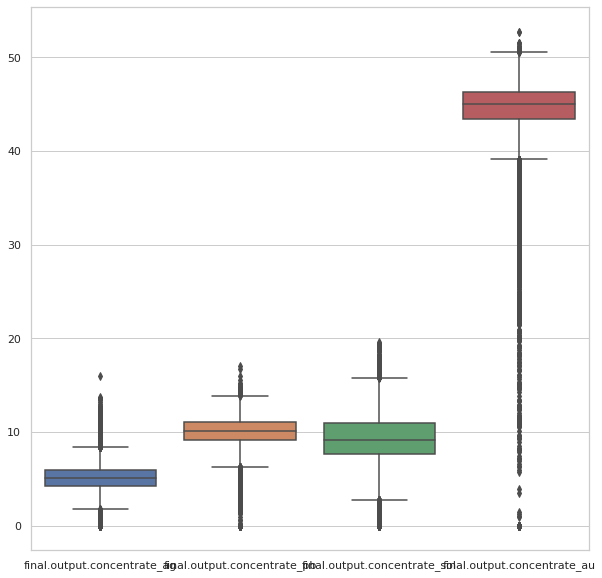

In [22]:
plt.figure(figsize=(10, 10))
a = sns.set(style="whitegrid")
a = sns.boxplot(data=concetrates_final)

Если проводить сравнение двух полученных графика с ящиками - концентрация золота подросла после финальной очистки.
Также можно отметить большое число выбросов. Особенно, опять же, в золоте.

### Распределение концентрации

Посмотрим на распределение концентрации на этапе первичной очистки

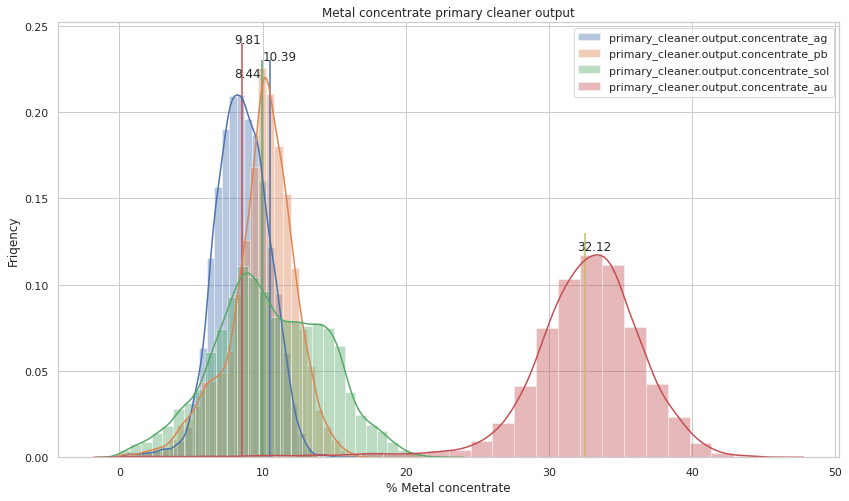

In [23]:
plt.figure(figsize=(14,8))
sns.distplot(df_full[df_full['primary_cleaner.output.concentrate_ag']>0.3]['primary_cleaner.output.concentrate_ag'],bins=30,label='primary_cleaner.output.concentrate_ag')
sns.distplot(df_full[df_full['primary_cleaner.output.concentrate_pb']>0.01]['primary_cleaner.output.concentrate_pb'],bins=30,label='primary_cleaner.output.concentrate_pb')
sns.distplot(df_full[df_full['primary_cleaner.output.concentrate_sol']>0.01]['primary_cleaner.output.concentrate_sol'],bins=30,label='primary_cleaner.output.concentrate_sol')
sns.distplot(df_full[df_full['primary_cleaner.output.concentrate_au']>0.01]['primary_cleaner.output.concentrate_au'],bins=30,label='primary_cleaner.output.concentrate_au')
plt.vlines(df_full[df_full['primary_cleaner.output.concentrate_ag']>0.3]['primary_cleaner.output.concentrate_ag'].mean(),0,0.24,color = 'r')
plt.vlines(df_full[df_full['primary_cleaner.output.concentrate_pb']>0.3]['primary_cleaner.output.concentrate_pb'].mean(),0,0.23,color = 'g')
plt.vlines(df_full[df_full['primary_cleaner.output.concentrate_sol']>0.3]['primary_cleaner.output.concentrate_sol'].mean(),0,0.23,color = 'b')
plt.vlines(df_full[df_full['primary_cleaner.output.concentrate_au']>0.3]['primary_cleaner.output.concentrate_au'].mean(),0,0.13,color = 'y')

plt.text(8,0.22,round(df_full['primary_cleaner.output.concentrate_ag'].mean(),2),fontsize=12)
plt.text(8,0.24,round(df_full['primary_cleaner.output.concentrate_pb'].mean(),2),fontsize=12)
plt.text(10,0.23,round(df_full['primary_cleaner.output.concentrate_sol'].mean(),2),fontsize=12)
plt.text(32,0.12,round(df_full['primary_cleaner.output.concentrate_au'].mean(),2),fontsize=12)
plt.legend()
plt.title('Metal concentrate primary cleaner output')
plt.xlabel("% Metal concentrate")
plt.ylabel("Friqency")
None

Финальная очистка:

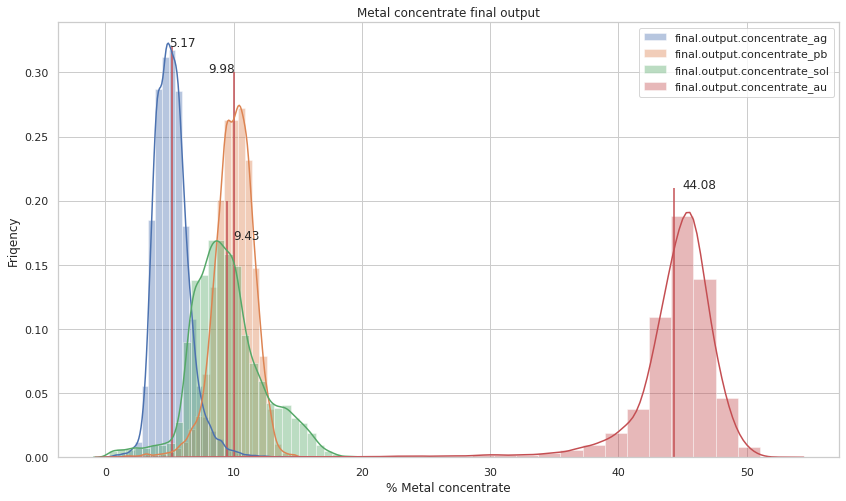

In [24]:
plt.figure(figsize=(14,8))
sns.distplot(df_full[df_full['final.output.concentrate_ag']>0.03]['final.output.concentrate_ag'],bins=30,label='final.output.concentrate_ag')
sns.distplot(df_full[df_full['final.output.concentrate_pb']>0.03]['final.output.concentrate_pb'],bins=30,label='final.output.concentrate_pb')
sns.distplot(df_full[df_full['final.output.concentrate_sol']>0.03]['final.output.concentrate_sol'],bins=30,label='final.output.concentrate_sol')
sns.distplot(df_full[df_full['final.output.concentrate_au']>0.03]['final.output.concentrate_au'],bins=30,label='final.output.concentrate_au')
plt.vlines(df_full[df_full['final.output.concentrate_ag']>0.3]['final.output.concentrate_ag'].mean(),0,0.32,color = 'r')
plt.vlines(df_full[df_full['final.output.concentrate_pb']>0.3]['final.output.concentrate_pb'].mean(),0,0.30,color = 'r')
plt.vlines(df_full[df_full['final.output.concentrate_sol']>0.3]['final.output.concentrate_sol'].mean(),0,0.20,color = 'r')
plt.vlines(df_full[df_full['final.output.concentrate_au']>0.3]['final.output.concentrate_au'].mean(),0,0.21,color = 'r')

plt.text(5,0.32,round(df_full['final.output.concentrate_ag'].mean(),2),fontsize=12)
plt.text(8,0.30,round(df_full['final.output.concentrate_pb'].mean(),2),fontsize=12)
plt.text(10,0.17,round(df_full['final.output.concentrate_sol'].mean(),2),fontsize=12)
plt.text(45,0.21,round(df_full['final.output.concentrate_au'].mean(),2),fontsize=12)

plt.legend()
plt.title('Metal concentrate final output')
plt.xlabel("% Metal concentrate")
plt.ylabel("Friqency")
None

После финальной очистки, если сравнивать два полученных графика, концентрация распределилась более плотно к среднему. Концентрация золота подросла - с `32` до `44%`

### Этап флотации

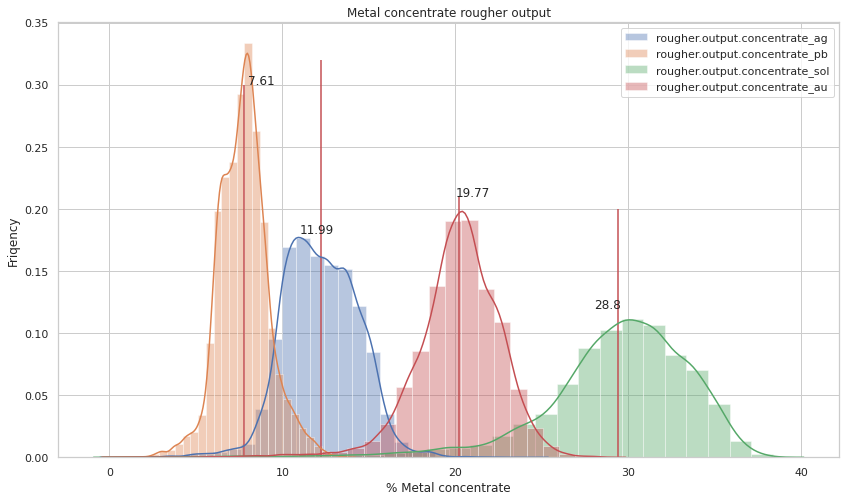

In [25]:
plt.figure(figsize=(14,8))
sns.distplot(df_full[df_full['rougher.output.concentrate_ag']>0.03]['rougher.output.concentrate_ag'],bins=30,label='rougher.output.concentrate_ag')
sns.distplot(df_full[df_full['rougher.output.concentrate_pb']>0.03]['rougher.output.concentrate_pb'],bins=30,label='rougher.output.concentrate_pb')
sns.distplot(df_full[df_full['rougher.output.concentrate_sol']>0.03]['rougher.output.concentrate_sol'],bins=30,label='rougher.output.concentrate_sol')
sns.distplot(df_full[df_full['rougher.output.concentrate_au']>0.03]['rougher.output.concentrate_au'],bins=30,label='rougher.output.concentrate_au')
plt.vlines(df_full[df_full['rougher.output.concentrate_ag']>0.3]['rougher.output.concentrate_ag'].mean(),0,0.32,color = 'r')
plt.vlines(df_full[df_full['rougher.output.concentrate_pb']>0.3]['rougher.output.concentrate_pb'].mean(),0,0.30,color = 'r')
plt.vlines(df_full[df_full['rougher.output.concentrate_sol']>0.3]['rougher.output.concentrate_sol'].mean(),0,0.20,color = 'r')
plt.vlines(df_full[df_full['rougher.output.concentrate_au']>0.3]['rougher.output.concentrate_au'].mean(),0,0.21,color = 'r')

plt.text(11,0.18,round(df_full['rougher.output.concentrate_ag'].mean(),2),fontsize=12)
plt.text(8,0.30,round(df_full['rougher.output.concentrate_pb'].mean(),2),fontsize=12)
plt.text(28,0.12,round(df_full['rougher.output.concentrate_sol'].mean(),2),fontsize=12)
plt.text(20,0.21,round(df_full['rougher.output.concentrate_au'].mean(),2),fontsize=12)

plt.legend()
plt.title('Metal concentrate rougher output')
plt.xlabel("% Metal concentrate")
plt.ylabel("Friqency")
None

Концентрация металлов заметно подросла. На примере золота видно, что она была `12`, а стала `28.8`, что является увеличением более чем в два раза

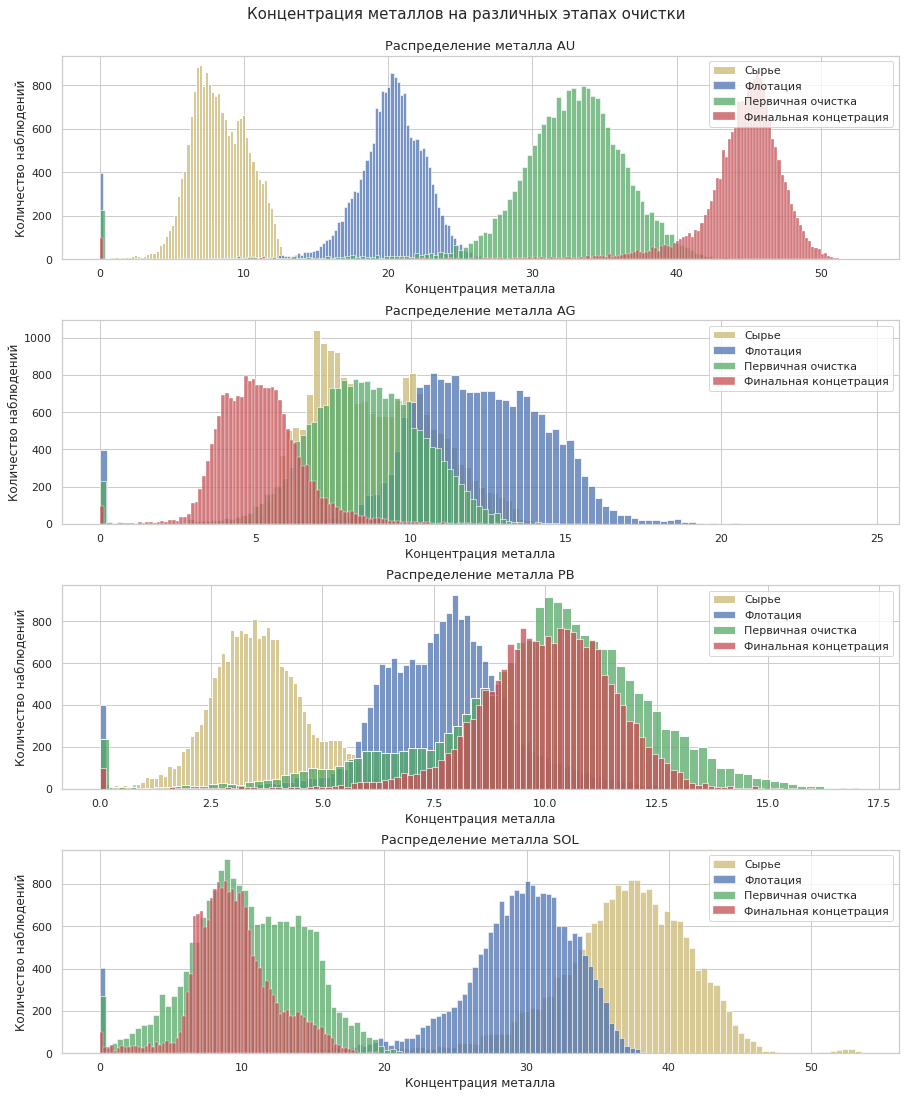

In [26]:
position = 0
plt.figure(figsize=[15, 17])
plt.subplots_adjust(top=0.94, wspace=0.2, hspace=0.3)
plt.suptitle('Концентрация металлов на различных этапах очистки', fontsize=15)
for metal in ['au', 'ag', 'pb', 'sol']:
    position += 1
    plt.subplot(4, 1, position)
    plt.title(f'Распределение металла {str(metal).upper()}', fontsize=13)
    sns.set_style('whitegrid')
    sns.histplot(df_full[f'rougher.input.feed_{metal}'], color='y', label='Сырье', kde=False)
    sns.histplot(df_full[f'rougher.output.concentrate_{metal}'], color='b', label='Флотация', kde=False)
    sns.histplot(df_full[f'primary_cleaner.output.concentrate_{metal}'], color='g', label='Первичная очистка', kde=False)
    sns.histplot(df_full[f'final.output.concentrate_{metal}'], color='r', label='Финальная концетрация',kde=False)
    plt.xlabel('Концентрация металла')
    plt.ylabel('Количество наблюдений')
    plt.legend()
plt.show();

По выведенным графикам видно:

* Концентрация AU после каждого этапа очистки постепенно увеличивается;
* Концентрация AG сначала увеличивается до этапа флотации, а потом становится меньше изначального;
* Концентрация PB постепенно растет, но после этапа первичной очистки остается примерно на том же уровне;
* Концентрация SOL после каждого этапа очистки постепенно уменьшается.

### Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках

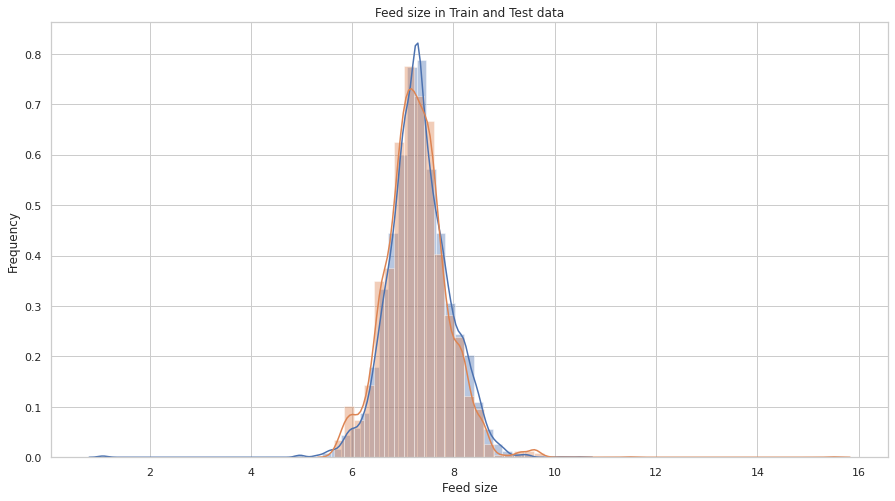

In [27]:
plt.figure(figsize=(15,8))
sns.distplot(df_train['primary_cleaner.input.feed_size'], label = 'train primary_cleaner.input.feed_size')
sns.distplot(df_test['primary_cleaner.input.feed_size'], label = 'test primary_cleaner.input.feed_size')
plt.title('Feed size in Train and Test data')
plt.legend
plt.xlabel('Feed size')
plt.ylabel('Frequency')
None

На графике невооруженным глазом видно, что распределение размеров гранул сырья совпадает у обоих выборок.

###  Cуммарная концентрация всех веществ на разных стадиях

In [28]:
# # Сумма концентраций металлов после флотации
# df_full['sum_concentrate_rougher'] = df_full['rougher.output.concentrate_ag'] + df_full['rougher.output.concentrate_pb'] + df_full['rougher.output.concentrate_sol'] + df_full['rougher.output.concentrate_au']

# # Сумму концентраций металлов после первичной очистки
# df_full['sum_primary_cleaner_output_concentrate'] = df_full['primary_cleaner.output.concentrate_ag'] + df_full['primary_cleaner.output.concentrate_pb'] + df_full['primary_cleaner.output.concentrate_sol'] + df_full['primary_cleaner.output.concentrate_au']

# # Сумма концентраций металлов после финальной очистки
# df_full['sum_final_output_concentrate'] = df_full['final.output.concentrate_ag'] + df_full['final.output.concentrate_pb'] + df_full['final.output.concentrate_sol'] + df_full['final.output.concentrate_au']
# sum_concentrate = ['sum_concentrate_rougher', 'sum_primary_cleaner_output_concentrate', 'sum_final_output_concentrate']

In [29]:
# plt.figure(figsize=(14,8))
# sns.distplot(df_full[df_full['sum_concentrate_rougher']>0.04]['sum_concentrate_rougher'],bins=80,label='sum_concentrate_rougher')
# sns.distplot(df_full[df_full['sum_primary_cleaner_output_concentrate']>0.04]['sum_primary_cleaner_output_concentrate'],bins=80,label='sum_primary_cleaner_output_concentrate')
# sns.distplot(df_full[df_full['sum_final_output_concentrate']>0.04]['sum_final_output_concentrate'],bins=80,label='sum_final_output_concentrate')
# plt.vlines(df_full[df_full['sum_concentrate_rougher']>0.3]['sum_concentrate_rougher'].mean(),0,0.07,color = 'r')
# plt.vlines(df_full[df_full['sum_primary_cleaner_output_concentrate']>0.3]['sum_primary_cleaner_output_concentrate'].mean(),0,0.10,color = 'r')
# plt.vlines(df_full[df_full['sum_final_output_concentrate']>0.3]['sum_final_output_concentrate'].mean(),0,0.17,color = 'r')
# plt.legend()
# plt.title('Sum concentrate of metal in rougher, primary clean and final state')
# plt.xlabel("Sum concentrate of metal")
# plt.ylabel("Frequency")
# None

Можно отметить присутствие данных с концентрацией от `0` до `40`. Они могут помешать обучению модели, поэтому считаю необходимым от них избавиться.

In [30]:
# df_full = df_full[df_full['sum_final_output_concentrate']>40]
# df_full = df_full[df_full['sum_primary_cleaner_output_concentrate']>40]
# df_full = df_full[df_full['sum_concentrate_rougher']>40]
# df_full.head()

In [31]:
# plt.figure(figsize=(14,8))
# sns.distplot(df_full['sum_concentrate_rougher'],bins=80,label='sum_concentrate_rougher')
# sns.distplot(df_full['sum_primary_cleaner_output_concentrate'],bins=80,label='sum_primary_cleaner_output_concentrate')
# sns.distplot(df_full['sum_final_output_concentrate'],bins=80,label='sum_final_output_concentrate')
# plt.vlines(df_full['sum_concentrate_rougher'].mean(),0,0.07,color = 'r')
# plt.vlines(df_full['sum_primary_cleaner_output_concentrate'].mean(),0,0.10,color = 'r')
# plt.vlines(df_full['sum_final_output_concentrate'].mean(),0,0.17,color = 'r')
# plt.legend()
# plt.title('Sum concentrate of metal in rougher, primary clean and final state')
# plt.xlabel("Sum concentrate of metal")
# plt.ylabel("Frequency")
# None

In [32]:
# plt.figure(figsize=(5,5))
# sns.set(style="whitegrid")
# sns.boxplot(data=df_full['sum_concentrate_rougher'])
# None

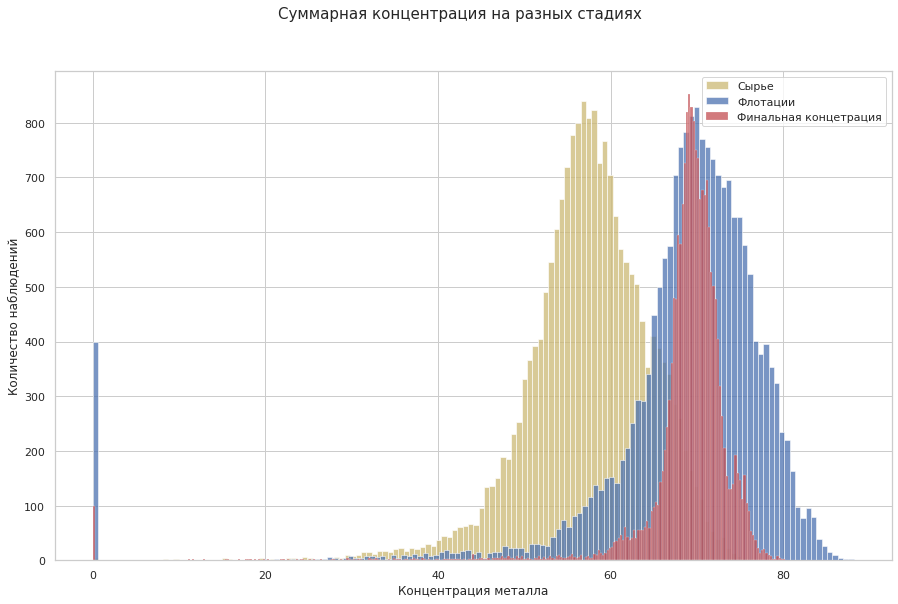

In [33]:
sum_concentrate_of_rougher_input = 0
sum_concentrate_of_rougher_output = 0
sum_concentrate_of_final_output = 0
for metal in ['au', 'ag', 'pb', 'sol']:
    sum_concentrate_of_rougher_input += df_full[f'rougher.input.feed_{metal}']
    sum_concentrate_of_rougher_output += df_full[f'rougher.output.concentrate_{metal}']
    sum_concentrate_of_final_output += df_full[f'final.output.concentrate_{metal}']
    
plt.figure(figsize=[15, 9])
plt.suptitle('Суммарная концентрация на разных стадиях', fontsize=15)
sns.set_style('whitegrid')
sns.histplot(sum_concentrate_of_rougher_input, color='y', label='Сырье', kde=False)
sns.histplot(sum_concentrate_of_rougher_output, color='b', label='Флотации', kde=False)
sns.histplot(sum_concentrate_of_final_output, color='r', label='Финальная концетрация',kde=False)
plt.xlabel('Концентрация металла')
plt.ylabel('Количество наблюдений')
plt.legend()
plt.show();

По графику видно - концентрация металла постепенно увеличивается по мере приближения к финальному этапу очистки. На самом же финальном этапе диапазон концентрации сужается.

In [34]:
df_train = df_train[(df_train['rougher.output.concentrate_au'] != 0) & (df_train['rougher.output.concentrate_ag'] != 0) & (df_train['rougher.output.concentrate_pb'] != 0) & (df_train['rougher.output.concentrate_sol'] != 0)]
df_train = df_train[(df_train['final.output.concentrate_au'] != 0) & (df_train['final.output.concentrate_ag'] != 0) & (df_train['final.output.concentrate_pb'] != 0) & (df_train['final.output.concentrate_sol'] != 0)]
df_train = df_train[(df_train['primary_cleaner.output.concentrate_au'] != 0) & (df_train['primary_cleaner.output.concentrate_ag'] != 0) & (df_train['primary_cleaner.output.concentrate_pb'] != 0) & (df_train['primary_cleaner.output.concentrate_sol'] != 0)]

df_train = df_train.reset_index()

## Модель

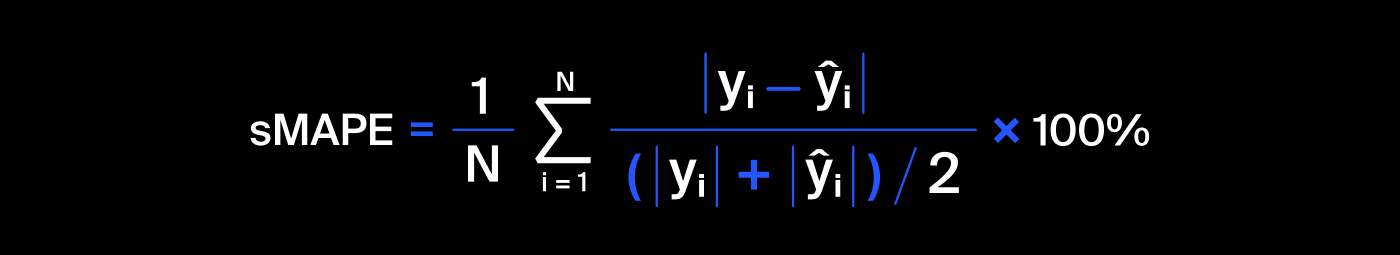

In [35]:
# Функция метрики качества
def sMAPE(predict, target):
    predict_rougher = predict[:,0]
    target__rougher = target[:,0]
    predict_final = predict[:,1]
    target__final = target[:,1]
    
    sMAPE_rougher = np.sum(abs(target__rougher-predict_rougher) / ((abs(target__rougher) + abs(predict_rougher)) / 2))
    

    sMAPE_rougher = sMAPE_rougher / len(target__rougher) * 100
    
   
    sMAPE_final = np.sum(abs(target__final-predict_final) / ((abs(target__final) + abs(predict_final)) / 2))
    sMAPE_final = sMAPE_final / len(target__final) * 100
    
    sMAP = 0.25 * sMAPE_rougher + 0.75 * sMAPE_final
    return sMAP

In [36]:
columns = df_test.columns # Берем столбцы тестовой выборки
feature = df_train[columns] # Формируем признаки из train только с теми столбцами, которые есть у нас в test
feature = feature.drop(['date'], axis=1) # Убираем дату
target = df_train[['rougher.output.recovery', 'final.output.recovery']] # Формируем вектор целевых признаков
target_array=np.array(target)

In [37]:
sample_size = int(len(target)/6) # Длина для кроссвалидации

In [38]:
# Линейная регрессия
# Кросс-валидация

mae_score=[]
smape_score=[]

for i in range(0, len(target), sample_size):
    valid_index = feature.iloc[i:i+sample_size].index
    
    train_index = feature.query('index not in @valid_index').index
    
    target_valid = target.iloc[valid_index]
   
    feature_valid = feature.iloc[valid_index]
    
    target_train = target.iloc[train_index]
    feature_train = feature.iloc[train_index]
    
    target_valid_arr = np.array(target_valid)
    
    model_regression = LinearRegression().fit(feature_train,target_train)
    prediction_regress = model_regression.predict(feature_valid)   
    
    mae = mean_absolute_error(prediction_regress,target_valid)
    mae_score.append(mae)
    smape = sMAPE(prediction_regress,target_valid_arr)
    smape_score.append(smape)
    
print(np.mean(mae_score))
print(np.mean(smape_score))

6.181765059268664
9.808510898117923


In [39]:
%%time
# Случайный лес
# Кросс-валидация

mae_score=[]
smape_score=[]
for i in range(0, len(target), sample_size):
    
    valid_index = feature.iloc[i:i+sample_size].index
    
    train_index = feature.query('index not in @valid_index').index
    
    target_valid = target.iloc[valid_index]
    feature_valid = feature.iloc[valid_index]
    
    target_train = target.iloc[train_index]
    feature_train = feature.iloc[train_index]
    
    target_valid_arr = np.array(target_valid)
    for i in range(1,5,1):
        
        model_forest = RandomForestRegressor(random_state=1234,max_depth=i,n_estimators=10).fit(feature_train,target_train)
        prediction_forest = model_forest.predict(feature_valid)
        mae = mean_absolute_error(prediction_forest,target_valid)
        mae_score.append(mae)
        smape = sMAPE(prediction_forest,target_valid_arr)
        smape_score.append(smape)
        
        print('max_depth:', i, 'MAE:', np.mean(mae_score))
        print('max_depth:', i, 'sMAPE:', np.mean(smape_score))

max_depth: 1 MAE: 5.990691879181171
max_depth: 1 sMAPE: 9.25105715483048
max_depth: 2 MAE: 6.089942883272894
max_depth: 2 sMAPE: 9.340648041543055
max_depth: 3 MAE: 6.280179319289974
max_depth: 3 sMAPE: 9.73272037679361
max_depth: 4 MAE: 6.390616282178623
max_depth: 4 sMAPE: 9.997753999341557
max_depth: 1 MAE: 6.414448101565685
max_depth: 1 sMAPE: 9.771941688600467
max_depth: 2 MAE: 6.349991145098909
max_depth: 2 sMAPE: 9.527822490331205
max_depth: 3 MAE: 6.256111189263796
max_depth: 3 sMAPE: 9.325276878215254
max_depth: 4 MAE: 6.151791409122856
max_depth: 4 sMAPE: 9.180278814132546
max_depth: 1 MAE: 5.998058206666351
max_depth: 1 sMAPE: 8.911927248055111
max_depth: 2 MAE: 5.845946598322953
max_depth: 2 sMAPE: 8.677234558035956
max_depth: 3 MAE: 5.745825804279982
max_depth: 3 sMAPE: 8.525212068458186
max_depth: 4 MAE: 5.700996437952479
max_depth: 4 sMAPE: 8.441374753499707
max_depth: 1 MAE: 5.73769783009706
max_depth: 1 sMAPE: 8.615960252259487
max_depth: 2 MAE: 5.750825473931191
max_d

In [40]:
%%time
# Случайный лес при параметрах:
# max_depth = 3
# n_estimators = 5


mae_score=[]
smape_score=[]
for i in range(0,len(target),sample_size):
    
    valid_index=feature.iloc[i:i+sample_size].index
    
    train_index=feature.query('index not in @valid_index').index
    
    target_valid=target.iloc[valid_index]
    feature_valid=feature.iloc[valid_index]
    
    target_train=target.iloc[train_index]
    feature_train=feature.iloc[train_index]
    
    target_valid_arr=np.array(target_valid)
    
        
    model_forest=RandomForestRegressor(random_state=1234,max_depth=3,n_estimators=5).fit(feature_train,target_train)
    prediction_forest=model_forest.predict(feature_valid)
    mae=mean_absolute_error(prediction_forest,target_valid)
    mae_score.append(mae)
    smape=sMAPE(prediction_forest,target_valid_arr)
    smape_score.append(smape)
        
print('MAE:',np.mean(mae_score))
print('sMAPE:',np.mean(smape_score))

MAE: 6.003615068344488
sMAPE: 9.103191019485912
CPU times: user 3.47 s, sys: 490 µs, total: 3.47 s
Wall time: 3.48 s


In [41]:
%%time
# Linear Support Vector Classification - всётаки Regression )

mae_score=[]
smape_score=[]
for i in range(0,len(target),sample_size):
    valid_index=feature.iloc[i:i+sample_size].index
    
    train_index=feature.query('index not in @valid_index').index
    
    target_valid=target.iloc[valid_index]
    feature_valid=feature.iloc[valid_index]
    
    target_train=target.iloc[train_index]
    feature_train=feature.iloc[train_index]
    
    target_valid_arr=np.array(target_valid)
    
    target_train_1=target_train.iloc[:,0]
    target_train_2=target_train.iloc[:,1]
    
    model_regressionSVR_1=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
    intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
    random_state=0, tol=1e-05, verbose=0).fit(feature_train,target_train_1)
    prediction_regressSVR_rouger=model_regressionSVR_1.predict(feature_valid)   
    
    model_regressionSVR_2=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
    intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
    random_state=0, tol=1e-05, verbose=0).fit(feature_train,target_train_2)
    prediction_regressSVR_final=model_regressionSVR_2.predict(feature_valid)   
    
    prediction_regressSVR=pd.DataFrame(prediction_regressSVR_rouger)
    prediction_regressSVR['final.output.recovery']=pd.DataFrame(prediction_regressSVR_final)
    prediction_regressSVR.set_axis(['rougher.output.recovery','final.output.recovery'],axis='columns',inplace=True)
    prediction_regressSVR=np.array(prediction_regressSVR)
    smape=sMAPE(prediction_regressSVR,target_valid_arr)
    smape_score.append(smape)
    
print(np.mean(smape_score))

10.301917235510857
CPU times: user 29.9 s, sys: 1.01 s, total: 31 s
Wall time: 31.1 s


### Проверка на тестовом наборе данных

In [42]:
# df_test.info()

In [43]:
target = df_full[['date','rougher.output.recovery', 'final.output.recovery']]
test = df_test.merge(target, on=['date'], how='left')
test = test.dropna()

target = test[['rougher.output.recovery', 'final.output.recovery']]
feature = test.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)

display(target.shape)
display(feature.shape)

(5229, 2)

(5229, 52)

In [44]:
prediction_reg = model_regression.predict(feature)

smape_line = sMAPE(prediction_reg, np.array(target))
smape_line

9.093132609451562

In [45]:
prediction_forest = model_forest.predict(feature)

smape_forest = sMAPE(prediction_forest,np.array(target))
smape_forest

8.611892825612502

In [46]:
prediction_regressSVR_rouger = model_regressionSVR_1.predict(feature) 
prediction_regressSVR_final = model_regressionSVR_2.predict(feature) 

prediction_regressSVR=pd.DataFrame(prediction_regressSVR_rouger)
prediction_regressSVR['final.output.recovery']=pd.DataFrame(prediction_regressSVR_final)
prediction_regressSVR.set_axis(['rougher.output.recovery','final.output.recovery'],axis='columns',inplace=True)
prediction_regressSVR=np.array(prediction_regressSVR)

In [47]:
smape_line_svr=sMAPE(prediction_regressSVR,np.array(target))
smape_line_svr

11.406364802647522

### Проверка модели на адекватность

In [48]:
target_train = df_train[['rougher.output.recovery', 'final.output.recovery']]
features_train = df_train.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)

dummy_model = DummyRegressor(strategy= 'mean')
dummy_model.fit(features_train, target_train)
prediction_dummy = dummy_model.predict(feature)

smape_dummy = sMAPE(prediction_dummy, np.array(target))
smape_dummy

9.4051251334699

Наша константная модель показала значение sMAPE сильно выше, чем у лучшей модели - случайного леса, что показывает хорошее качество RandomForest.

## Общий вывод

В данном проекте мы провели небольшой анализ данных, убедившись в том, что они корректны и подходят под наше исследование. На их основе выполнили:
* Исследование концентрации металлов на различных этапах обработки;
* Исследование суммарных концентраций;
* Сравнение распределения размеров гранул сырья;
* Построили модели для, предсказывающие коэффициент восстановления золота из золотосодержащей руды.

В ходе выполнения проекта было выяснено:
* Концентрация золота по мере прохождения очистки растет вплоть до `~44%`;
* Концентрация аллюминия ведет себя примерно похожим образом, но после первичной очистки практически не изменяется;
* Концентрация AG и SOL после финальной очистки начинает уменьшаться.

Модели имеют sMAPE на тестовом наборе данных:
* LinearRegression - `9.8`;
* RandomForest - `9.1`;
* LinearSVR - `10.3`.

In [49]:
models = ['LinearRegression', 'RandomForestRegressor', 'LinearSVR']

sMAPE_rezult = pd.DataFrame(np.array([smape_line, smape_forest,smape_line_svr]), index=models)
sMAPE_rezult.set_axis(['sMAPE'], axis='columns', inplace=True)

In [50]:
display('На тестовом наборе данных модели показали себя:', sMAPE_rezult)

'На тестовом наборе данных модели показали себя:'

,sMAPE
LinearRegression,9.093133
RandomForestRegressor,8.611893
LinearSVR,11.406365


По данным из сводной таблицы можно сделать вывод - лучше всего себя показала модель случайного леса с показателями sMAPE `6.71`, опережающие показатели константной модели, имеющей sMAPE `9.87`